In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Medal distribution by country

pd.options.display.max_rows=1000
df_athelete = pd.read_excel("./data/Athletes.xlsx")
df_coaches = pd.read_excel("./data/Coaches.xlsx")
df_entries_gender = pd.read_excel("./data/EntriesGender.xlsx")
df = pd.read_excel("./data/Medals.xlsx")
df_medals = pd.read_excel("./data/Medals.xlsx")
df_teams = pd.read_excel("./data/Teams.xlsx")


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:

df_athelete_by_noc = df_athelete[["Name","NOC"]].groupby("NOC").count().sort_values(by="Name", ascending=False)
df_athelete_by_noc.head()


,Name
NOC,
United States of America,615
Japan,586
Australia,470
People's Republic of China,401
Germany,400


In [38]:
print(df_athelete.count())

Name          11085
NOC           11085
Discipline    11085
dtype: int64


In [27]:
df_country=df.info()
df_country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92],
 [Text(0, 0, 'United States of America'),
  Text(1, 0, "People's Republic of China"),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'Great Britain'),
  Text(4, 0, 'ROC'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Netherlands'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Italy'),
  Text(10, 0, 'Canada'),
  Text(11, 0, 'Brazil'),
  Text(12, 0, 'New Zealand'),
  Text(13, 0, 'Cuba'),
  Text(14, 0, 'Hungary'),
  Text(15, 0, 'Republic of Korea'

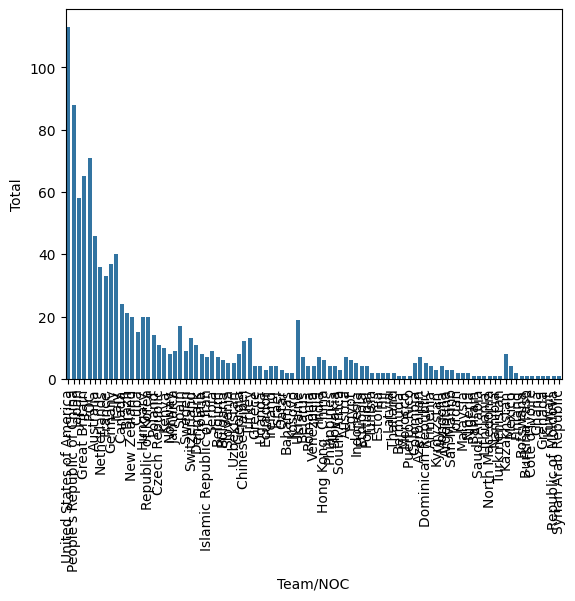

In [28]:
medal_count = df[["Team/NOC","Total"]]
medal_count

sns.barplot(x="Team/NOC", y="Total", data=medal_count)
plt.xticks(rotation='vertical')

In [29]:
df_corr=df[["Rank","Total"]].corr()
df_corr

,Rank,Total
Rank,1.000000,-0.655877
Total,-0.655877,1.000000


In [44]:
df_country_with_athelete_medal = pd.merge( df_athelete_by_noc,medal_count, left_on="NOC", right_on="Team/NOC",how="inner")
df_country_with_athelete_medal.head()

,Name,Team/NOC,Total
0,615,United States of America,113
1,586,Japan,58
2,470,Australia,46
3,401,People's Republic of China,88
4,400,Germany,37


In [45]:
corr_df_country_athelete=df_country_with_athelete_medal[["Name","Total"]].corr()
corr_df_country_athelete

,Name,Total
Name,1.000000,0.875115
Total,0.875115,1.000000


In [50]:
# gender wise

df_entries_gender.head()


,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [58]:
df_entries_gender_corr=df_entries_gender[["Female","Male","Total"]].corr()
df_teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women
